In [ ]:
"""
「決定的(deterministic)」であるプログラムとは、同じデータに対して全く同じ結果を出力するプログラムをいう。

「大数の法則(law of large numbers)」とは、特定の事象が起こる確率と、実際に試行を繰り返す中でその事象が起こる確率の差が、
 試行の回数が無限大に近づくとき、0に収束するという法則である。
 
 「賭博者の誤謬(gambler's fallacy)」とは、結果に偏りが出た時に将来的に逆の偏りによって相殺されるという、大数の法則に対する誤った解釈を指す。
 
 「平均への回帰(regresion to the mean)」とは、極端な確率事象が起こった後では、より、極端でない事象が起こりやすいというもの。
"""


In [ ]:
"""
[分布]
- 確率分布
- 正規分布
- 一様分布
- 二項分布、多項分布
- 指数分布、幾何分布
"""

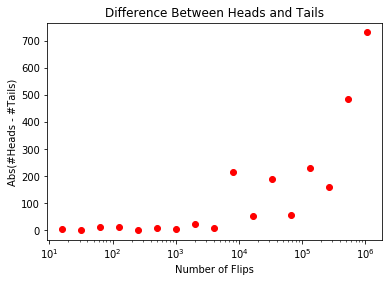

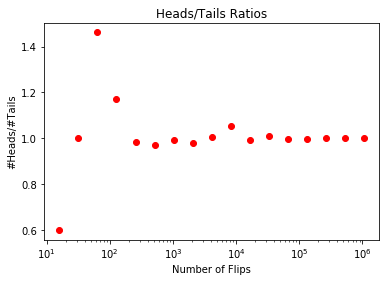

In [7]:
import random
import matplotlib.pylab as pylab

def flipPlot(minExp, maxExp):
    """minExpとmaxExpはminExp < maxExpを満たす正の整数とする
        2**minExpから2**maxExp回のコイン投げの結果をプロットする"""
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.xscale('log') # 対数目盛で表示
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'ro')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.xscale('log') # 対数目盛で表示
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'ro')
        
random.seed(0)
flipPlot(4, 20)

# コインの表と裏が出る回数の比率は、回数が増えるごとに1.0に近づいていることがわかる
# 一方で、表と裏の回数の差は、回数が増えるごとに増えているように見えるが、それだけでは
# 「回数が増えるほどバラつきが大きくなる」と結論を出すことはできない。

In [ ]:
"""
いくら標本を増やしても、全ての標本を調べない限り正確な結論は出せない。
そして通常は無限母集団を扱うので、全ての標本を調べることもできない。
それでは、どれくらいの標本を調べれば結論に自信を持てるか？それは母集団の分散に依存する。

分散とは、平均値と各要素の差をそれぞれ二乗し、合計した値を要素数で割ったものである。
標準偏差とは、分散の２乗根である。

"""

In [15]:
def variance(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    return variance(X)**0.5


In [25]:
import random
import matplotlib.pylab as pylab

def makePlot(xVals, yVals, title, xLabel, yLabel, style, logX = False, logY = False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()

def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

def flipPlot1(minExp, maxExp, numTrials):
    ratiosMeans, ratiosSDs = [], []
    diffsMeans, diffsSDs = [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            #diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        #diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        #diffsSDs.append(stdDev(diffs))
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips ', 'Mean Heads/Tails ', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of Flips ', 'Standard Deviation ', 'ko', logX = True, logY = True)

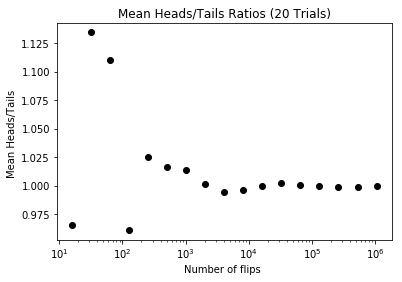

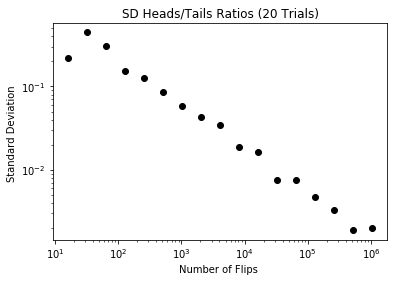

In [28]:
flipPlot1(4, 20, 20)

# 面と裏の出る回数の比の平均は、1に収束している
# 試行回数に対して標準偏差が線形に減少している = 試行を進めるにつれて分散が小さくなっている
# したがって、面と裏の比の期待値は、1.0に非常に近いと自信を持って言うことができる

In [29]:
# 標準偏差は、常に平均を踏まえて見なければ意味がない

# 変動係数(cofficient of variation)とは、標準偏差を平均で割ったもの
# 平均が異なるデータを比較するときに、変動係数は便利である

def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivitionError:
        return float('nan')
    

In [36]:
def flipPlot2(minExp, maxExp, numTrials):
    ratiosMeans, ratiosSDs = [], []
    diffsMeans, diffsSDs = [], []
    ratiosCVs, diffsCVs = [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips ', 'Mean Heads/Tails ', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of Flips ', 'Standard Deviation ', 'ko', logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title, 'Number of Flips', 'Mean abs(#Heads - #Tails)', 'ko', logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of Flips', 'SD abs(#Heads - #Tails)', 'ko', logX = True, logY = True)
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of Flips', 'Coeff. of Var.', 'ko', logX = True)
    title = 'Coeff. of Var. Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of Flips', 'Coeff. of Var.', 'ko', logX = True, logY = True)
    

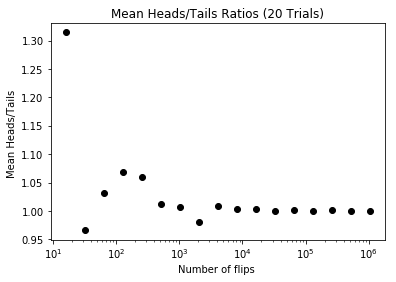

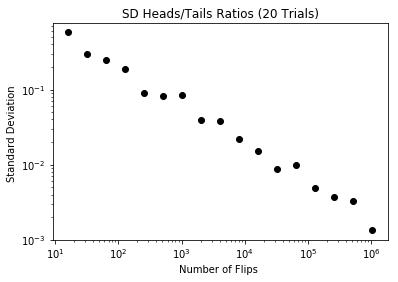

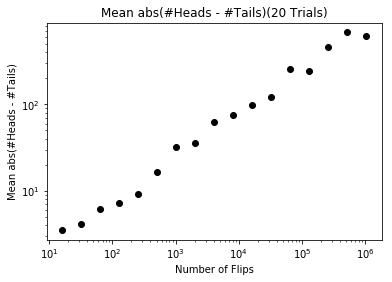

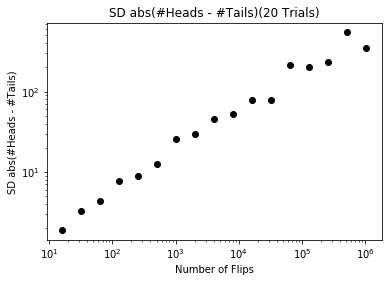

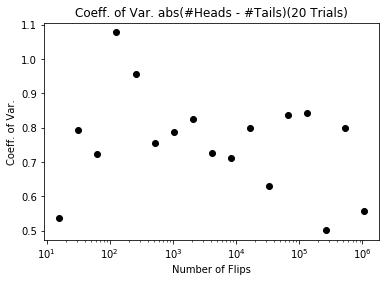

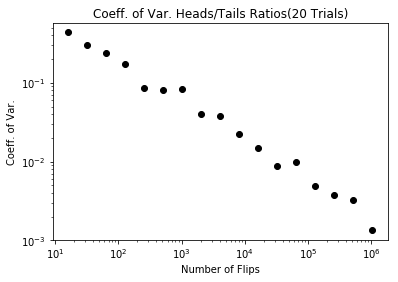

In [37]:
flipPlot2(4, 20, 20)

# ３番目の表は、面と裏の回数差の平均である
# ４番目の表は、面と裏の回数差の標準偏差である

# ５番目の表は、面と裏の回数差の変動係数である
#   →変動係数は上下に変動が大きく、一定の傾向が見られない
#       これはabs(#heads- #tails)の値のばらつき具合が、試行回数とは独立であることを表している

# 6番目の表は、面と裏の回数比の変動係数である
#   →回数に対して回数比の変動係数は線形に減少している
# 標準偏差のプロットと差が小さいのは当然である。平均値が1に近いので、２つのプロットにはあまり違いが出ない。

In [ ]:
"""
[変動係数]
変動係数が優れている点は異なる平均を持つ集合のばらつき具合を比較できる点である。

しかし常に標準偏差よりも有用というわけではない。
平均が0に近いと、平均が少し変わると変動係数が大きく変わってしまう。
変動係数に意味があるとは限らないことに注意が必要だ。
平均が0の場合は変動係数は定義されない。また、標準偏差と異なり信頼区間を設定することはできない。
"""

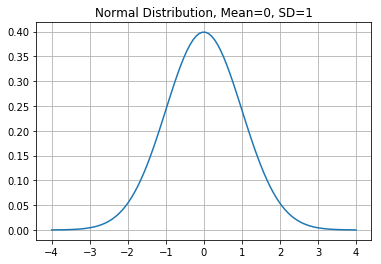

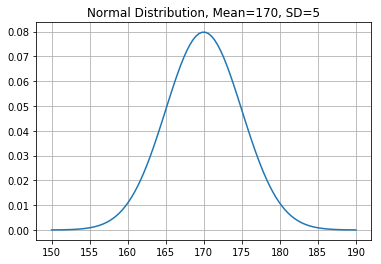

In [27]:
"""
[正規分布(normal distribution)]
ガウス分布とも呼ばれる確率密度関数である。
任意の値xに対する発生確率を表す。
平均と標準偏差の２つのパラメータにより完全に決定される。
正規分布の形は鐘形曲線(bell curve)とも呼ばれる

[確率密度関数(probability density function)(PDF)]
確率変数が2つの間に含まれる確率を表す
"""
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

def plotNormalDistribution(mu, sigma):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    plt.plot(x, mlab.normpdf(x, mu, sigma))
    plt.grid(True)
    plt.title("Normal Distribution, Mean={0}, SD={1}".format(mu, sigma))
    plt.show()

# 平均=0、標準偏差1の分布を持つ正規分布
plotNormalDistribution(0, 1)
# 平均=170、標準偏差10の分布を持つ正規分布
plotNormalDistribution(170, 5)

In [37]:
"""
離散値しかとらない確率変数をカテゴリカル変数という。
カテゴリカル変数が２種類の値しか取らないとき、その確率分布は２項分布(biomial distribution)と呼ばれる。
2項分布はn回の独立試行の中で、ちょうどk回成功する確率を考えるとわかりやすい。
nCk * (p**k) * (1 - p)**k
"""

import math

# 二項分布の確率計算プログラム
# 参考: https://atarimae.biz/archives/7922

def combinations_count(n, r):
    """異なるn個のものからr個選ぶ場合の数を計算する(組み合わせ)"""
    return math.factorial(n) // (math.factorial(n - r) * math.factorial(r))

def calcBiomialDistribution(n, k, p):
    """n=試行回数, k=事象の発生回数, p=事象の発生確率とする
    n回の独立試行の中で、ちょうどk回事象が発生する確率を計算する"""
    return combinations_count(n, k) * p**k * (1-p)**(n-k)

def tryBiomialDistribution(n, k, p):
    x = calcBiomialDistribution(n, k, p)
    print("n={0}, k={1}, p={2}, BD={3}".format(n, k, round(p, 4), round(x, 4)))

# 10回のサイコロ投げでちょうど1が２回出る確率
tryBiomialDistribution(10, 2, 1/6)

n=10, k=2, p=0.1667, BD=0.2907


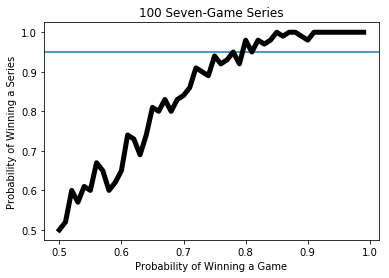

In [3]:
# 勝率が95%の確率でワールドシリーズに勝つためには、どれくらいの勝率が必要か？を計算する

import random
import matplotlib.pylab as pylab

def playSeries(numGames, teamProb):
    numWon = 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
    return (numWon > numGames//2)

def fractionWon(teamProb, numSeries, seriesLen):
    won = 0
    for series in range(numSeries):
        if playSeries(seriesLen, teamProb):
            won += 1
    return won/float(numSeries)

def simSeries(numSeries):
    prob = 0.5
    fracsWon, probs = [], []
    while prob <= 1.0:
        fracsWon.append(fractionWon(prob, numSeries, 7))
        probs.append(prob)
        prob += 0.01
    pylab.axhline(0.95)
    pylab.plot(probs, fracsWon, 'k', linewidth=5)
    pylab.xlabel('Probability of Winning a Game')
    pylab.ylabel('Probability of Winning a Series')
    pylab.title(str(numSeries) + ' Seven-Game Series')

# 勝率ごとに100回ワールドシリーズを行って優勝確率を計算する
simSeries(100)

# 95%の確率でワールドシリーズに優勝するためには0.8の勝率が必要